In [58]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, validation_curve

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Read the Dataset

In [126]:
titanic = pd.read_csv("train.csv")

In [127]:
df = titanic.copy()

In [128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore and Visualize Data

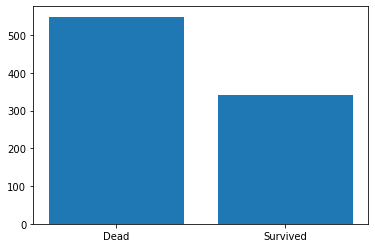

In [134]:
# Balanced or Unbalanced?
# Dataset is a bit Unbalanced as we can see
plt.figure()
plt.bar(x=["Dead", "Survived"], height=df["Survived"].value_counts().values)
plt.show()

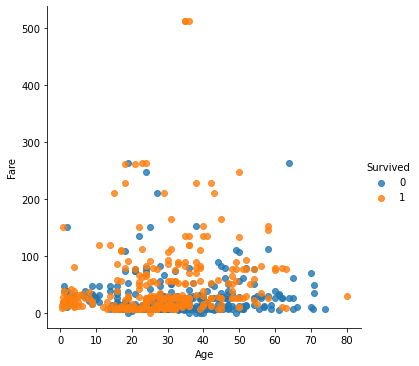

In [27]:
# Age and Fare distribution of Survival
sns.lmplot(x="Age", y="Fare", data=df, hue="Survived", fit_reg=False)
plt.show()

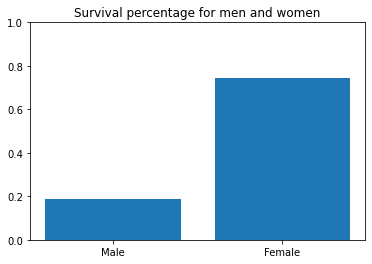

In [28]:
# Females survived much more than males
plt.figure()
male_sur = df[df.Sex == "male"].Survived.mean()
female_sur = df[df.Sex == "female"].Survived.mean()
plt.title("Survival percentage for men and women")
plt.ylim(0, 1)
plt.bar(["Male", "Female"], [male_sur, female_sur])
plt.show()

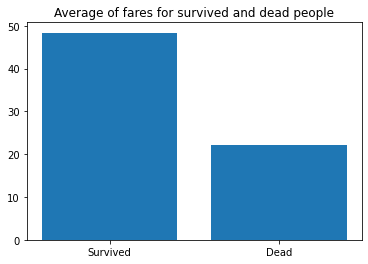

In [29]:
# Survivors' average fare(ücret) is higher than dead ones
plt.figure()
survived_fares = df[df.Survived == 1].Fare.mean()
dead_fares = df[df.Survived == 0].Fare.mean()
plt.title("Average of fares for survived and dead people")
plt.bar(["Survived", "Dead"], [survived_fares, dead_fares])
plt.show()

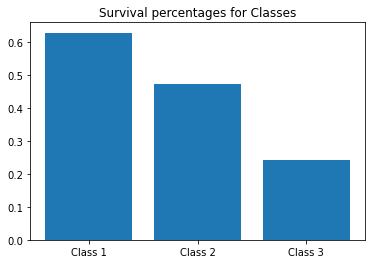

In [30]:
# Better class means high chance of surviving
plt.figure()
pclasses = np.sort(df.Pclass.unique())
survival_rates = [df[df.Pclass == i].Survived.mean() for i in pclasses]
plt.title("Survival percentages for Classes")
plt.bar(["Class "+str(i) for i in pclasses], survival_rates)
plt.show()

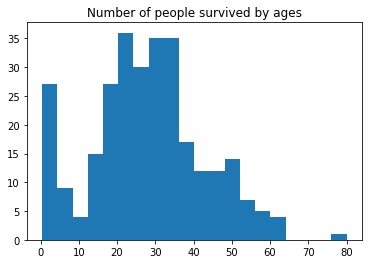

In [31]:
plt.figure()
survivals = df[df.Survived == 1].loc[:, ["Survived", "Age"]].set_index("Age")
plt.title("Number of people survived by ages")
plt.hist(x=survivals.index, bins=20)
plt.show()

# Clean and Process Data

## missing values

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Embarked Column

In [41]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
# fill Embarked Column with 'S' value
df["Embarked"].fillna("S", inplace=True)

### Age Column

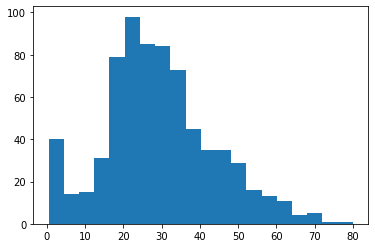

In [45]:
plt.figure()
plt.hist(df["Age"].values, bins=20)
plt.show()

In [47]:
# fill ages by median age
# median age = 29.7
df["Age"].fillna(df.Age.mean(), inplace=True)

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Drop Unnecessary Columns

In [49]:
df.drop(["Cabin", "PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [50]:
pd.get_dummies(df)b

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


### One Hot Encoding of Categorical Variables

In [51]:
df = pd.get_dummies(df)

In [52]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [53]:
# drop female as male is enough to give gender information
df.drop(["Sex_female"], axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [55]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


# Prepare Data for ML Models

In [59]:
X = df.values[:, 1:]
y = df.values[:, 0]

In [ ]:
0.90 * x / 100 = 0.10

In [74]:
0.10 / 0.90

0.11111111111111112

In [81]:
# split train, validation and test data
test_size = 0.10
val_size = 0.10
val_size = val_size / (1 - test_size)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, random_state=0, test_size=test_size)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, random_state=0, test_size=val_size)

#### scale

In [90]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ML Models 

In [ ]:
"""We will use f1 score as it can score both
balanced and unbalanced data very well."""

## SVM Model

In [97]:
svm = SVC(C=1000, kernel="rbf").fit(X_train, y_train)

In [106]:
preds = svm.predict(X_test)
f1_score(y_test, preds)

0.7042253521126761

In [107]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        51
         1.0       0.78      0.64      0.70        39

    accuracy                           0.77        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



## Logistic Regression

In [100]:
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [104]:
preds = log_reg.predict(X_test)
f1_score(y_test, preds)

0.7692307692307693

In [105]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        51
         1.0       0.77      0.77      0.77        39

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



## Decision Tree Classifier

In [108]:
dt = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [121]:
preds = dt.predict(X_test)
f1_score(y_test, preds)

0.7428571428571428

In [122]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84        51
         1.0       0.84      0.67      0.74        39

    accuracy                           0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.80      0.80        90



In [112]:
# cross validation scores
scores = cross_val_score(DecisionTreeClassifier(max_depth=4), X, y, cv=5)
print("Scores: ", scores)
print("Average Score: ", scores.mean())

Scores:  [0.75977654 0.8258427  0.81460674 0.78651685 0.84269663]
Average Score:  0.8058878915322328


## Neural Network Classifier

In [139]:
# tests with different layer sizes
for s in [(50), (100), (10, 10)]:
    nn = MLPClassifier(hidden_layer_sizes=s, activation="tanh", max_iter=1000).fit(X_train, y_train)
    preds = nn.predict(X_test)
    score = f1_score(y_test, preds)
    print("Hidden Layers: {}\t  Score: {}".format(s, score))

Hidden Layers: 50	  Score: 0.7500000000000001
Hidden Layers: 100	  Score: 0.7397260273972601
Hidden Layers: (10, 10)	  Score: 0.7605633802816902


In [113]:
nn = MLPClassifier(hidden_layer_sizes=(100), activation="tanh", max_iter=1000).fit(X_train, y_train)

In [115]:
preds = nn.predict(X_test)
f1_score(y_test, preds)

0.7500000000000001

In [116]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        51
         1.0       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



## Random Forest Classifier

In [117]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(X_train, y_train)

In [119]:
preds = rf.predict(X_test)
f1_score(y_test, preds)

0.7605633802816902

In [120]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        51
         1.0       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90



## Gaussian Naive Bayes

In [123]:
gnb = GaussianNB().fit(X_train, y_train)

In [124]:
preds = gnb.predict(X_test)
f1_score(y_test, preds)

0.7848101265822786

In [125]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        51
         1.0       0.78      0.79      0.78        39

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [ ]:
"""Random Forest, Logistic Regression and Gaussian NB have good prediction results.
But Gaussian NB is the best as we can see from its score."""